# HEART-DISEASE-PREDICTION-PROJECT

Steps:

## 1. Problem Definition
Based on the available information of clinical parameters of patients, we're gonna predict whether a patient has heart disease or not.

## 2. Data
We will be using the heart-disease.csv file for our purpose.
The original data came from : https://archive.ics.uci.edu/ml/datasets/Heart+Disease
Another version of the data is available at kaggle : https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
We need an accuracy of greater than 95% in predicting whether a patient has heart disease or not

## 4. Features

* age(age in years)
* sex(1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* cholserum (cholestoral in mg/dl)
* fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg resting electrocardiographic results
* thalach maximum heart rate achieved
* exang exercise induced angina (1 = yes; 0 = no)
* oldpeak ST depression induced by exercise relative to rest
* slope (the slope of the peak exercise ST segment)
* ca (number of major vessels (0-3) colored by flourosopy)
* thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target (1 or 0)

## Preparing the tools
We're going to use Pandas, Scikit-learn and Matplotlib for Data analysis and Manipulation.

In [66]:
#importing all the tools we need

# Importing Regular EDA(Exploratory data analysis) tools and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Importing Scikit-learn models (for modelling) # Machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Importing the Data

In [67]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Let's count, how many of each class there are :

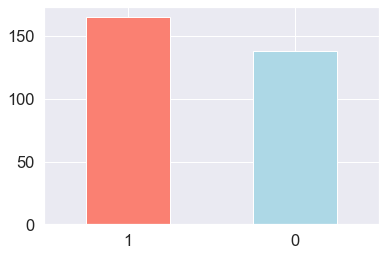

In [203]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

plt.xticks(rotation=0);

## We have nearly the same size of samples for each class, so we can say that it's kind of a balanced classification problem.

In [151]:
# Let's visualize it for better understanding
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [70]:
# Detailed information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [71]:
# Let's search for any missing values :
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [72]:
# Statistical information about the data :
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## let's try to find relationships between features of a patient and the target variable
### Let's compare sex with the target variable

### Heart Disease Frequency with respect to sex

In [73]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


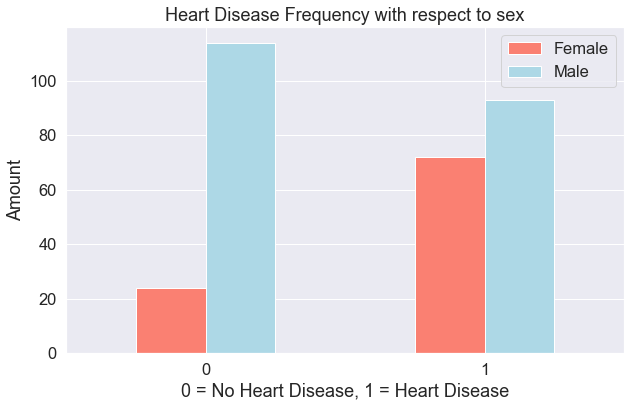

In [74]:
# Let's built a plot for it for better visualization

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency with respect to sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

### Let's compare our independent variables together and how they relate to the target. 

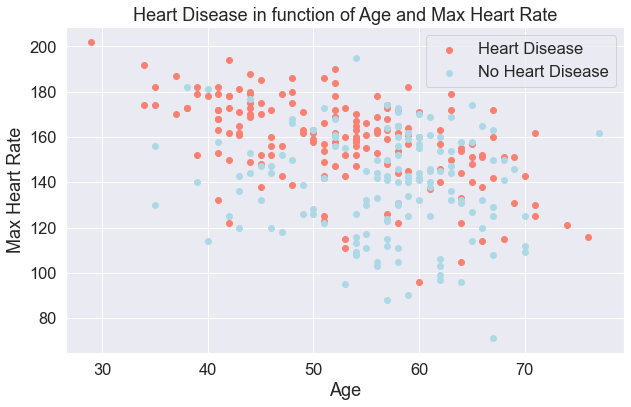

In [75]:
# Create a plot for 2 subplots
plt.figure(figsize=(10,6))

# First, let's try for positive values of target
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c=["salmon"])

# Now, Let's try for negative values of target
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c=["lightblue"])

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"]);

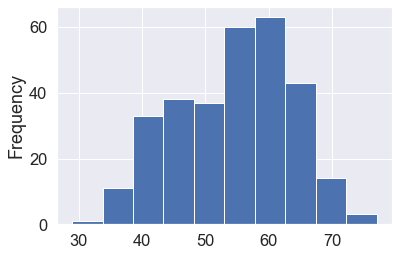

In [76]:
### Let's check the distribution/spread of age column
df.age.plot.hist();

### Heart Disease frequency per Chest Pain Type (CP)

In [77]:
# Let's compare CP with target

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


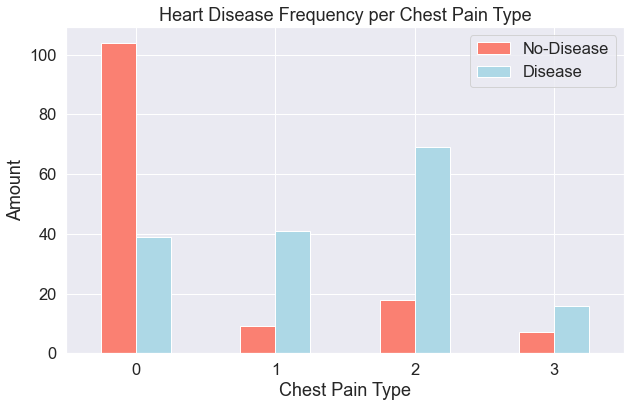

In [78]:
# Let's visualize it better !
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.legend(["No-Disease", "Disease"]);
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [79]:
## Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


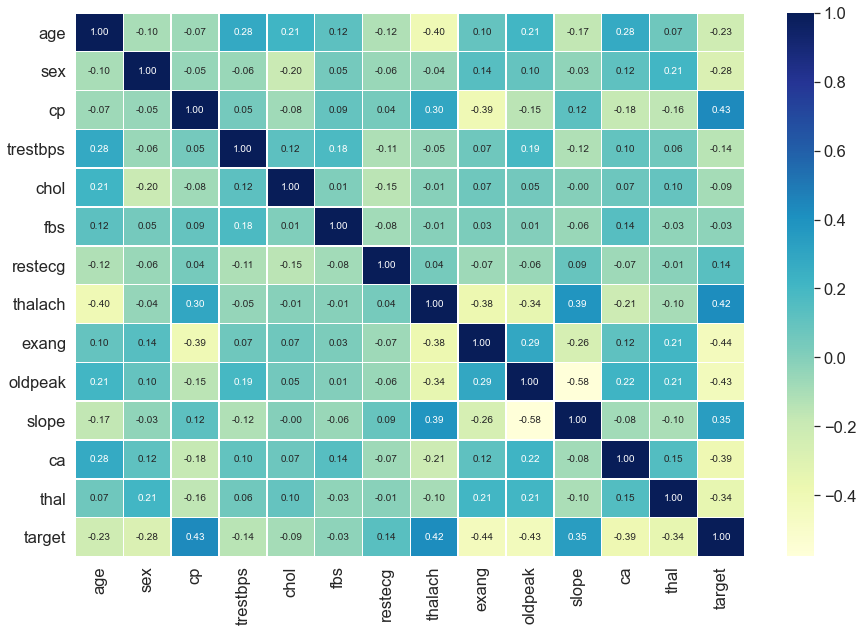

In [80]:
## Let's visualize it in a better way !
corr_matrix = df.corr()

fig, ax= plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt="0.2f",
                 cmap="YlGnBu"
                );

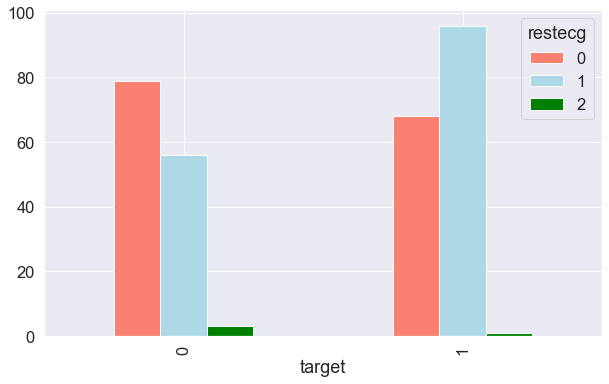

In [81]:
# Comparing two feature columns using pandas crosstab
pd.crosstab(df.target, df.restecg).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue","green"]);

### Split Data into features and labels

In [82]:
X = df.drop("target", axis=1)
y = df["target"]

In [83]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [84]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Split the data into training & test sets

In [85]:
np.random.seed(42)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


### Now, we've got our data split into training and test sets, it's time to build a machine learning model.

### We'll train it (to find patterns) on our training data.
### We'll test it (apply found patterns) on our test data.

Let's look at the models we're going to use:
* Logistic Regression
* KNeighborsClassifier
* RandomForestClassifier

### But, insted of fitting the data to the models and evaluating them separately,
we're going to create a function to fit and evaluate the models in one go !

In [88]:
# creating a dictionary containing the models
models = { "LogisticRegression" : LogisticRegression(),
           "KNN" : KNeighborsClassifier(),
           "RandomForestClassifier" : RandomForestClassifier()
            }

# function to fit and score the models on data
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Function for training and evaluating the models on the data.
    
    models: a dictionary of Scikit-Learn machine learning models 
    X_train: training data for training (no labels) 
    X_test: testing data for evaluation (no labels)
    y_train: training labels
    y_test : testing labels
    """
    
    # set random seed
    np.random.seed(42)
    #creating a dictionary for storing the scores of models
    model_scores = {}
    
    #Looping over models 
    for name, model in models.items():
        #fitting the model
        model.fit(X_train, y_train)
        #Scoring the model and storing the results in model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    # return the model scores
    return model_scores

# Let's evaluate our models

In [89]:
model_scores = fit_and_score(models=models,
                              X_train=X_train,
                              X_test=X_test,
                              y_train=y_train,
                              y_test=y_test)

model_scores

C:\Users\Prabal\Desktop\Projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparison

In [90]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,LogisticRegression,KNN,RandomForestClassifier
accuracy,0.885246,0.688525,0.836066


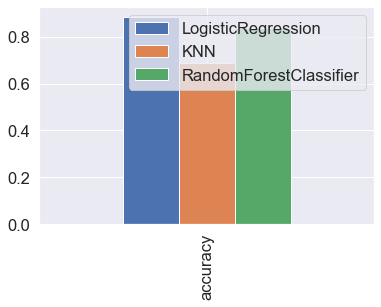

In [91]:
model_compare.plot.bar();

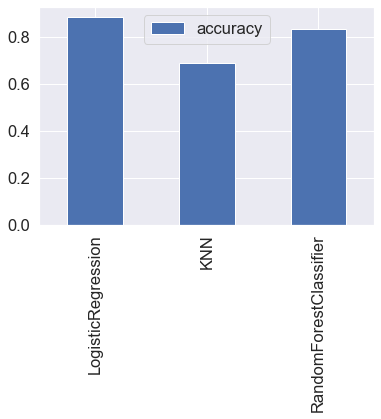

In [92]:
model_compare.T.plot.bar();

#### Now, we've got our baseline models ready. But, we know that usually the first predictions from our models are not the best and we should not put our next steps off them..

So, what do we do ?

Let's look at the following:

Almost machine learning model: 
* Hyperparameter tuning
* Feature importance

For Classification only:
* Confusion Matrix
* Cross-validation
* Precision
* F1 Score
* Recall
* Classification Report
* ROC Curve
* Area under the Curve (AUC)

### Hyperparameter Tuning (By Hand)

In [93]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list for different values of n_neighbors (Hyperparameter)
neighbors = range(1,21)

# KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fitting the model
    knn.fit(X_train,y_train)
    
    # Append training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Append test scores
    test_scores.append(knn.score(X_test, y_test))
    

In [94]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [95]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score of KNN on the test set: 75.41%


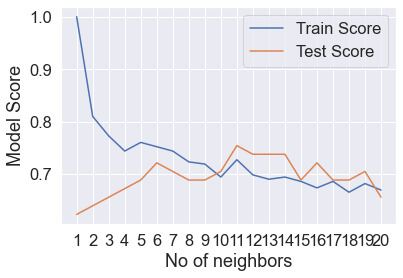

In [96]:
# Let's visualize KNN's performance

plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum score of KNN on the test set: {max(test_scores)*100:.2f}%")

#### Even with the score of 75.41%, the KNN is not up to the mark as compared to LogisticRegression or RandomForestClassifier
So, we're going to discard it for now..

## Hyperparameter Tuning with RandomizedSearchCV 

In [97]:
# Creating Hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Creating Hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf":np.arange(1, 20, 2)}

In [98]:
# Let's tune our LogisticRegression model with RandomizedSearchCV
np.random.seed(42) # So our results are reproducible

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [99]:
#Search for best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [100]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

#### Our score is the same as compared with baseline LogisticRegression model.

### Let's try tuning the RandomForestClassifier

In [101]:
# Setup Random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fitting the RandomForestClassifier on data
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [102]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [103]:
rs_rf.score(X_test, y_test)

0.8688524590163934

#### The score is improved if we compare it with the baseline RandomForestClassifier model

In [104]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

#### However, LogisticRegression still performs better. So, we'll continue with that !

## Hyperparameter Tuning with GridSearchCV

In [105]:
# Set hyperparameters for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,30),
           "solver": ["liblinear"]}

In [106]:
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [107]:
# Best hyperparameters for logisticRegression

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [108]:
# Evaluating our LogisticRegression Model

gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned LogisticRegression classifier, beyond accuracy...

What we have to do : 
* ROC Curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

... It would be better to use cross-validation wherever possible

To make comparisons and evaluate our trained model, first we need to make predication. 

In [109]:
y_preds = gs_log_reg.predict(X_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [110]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

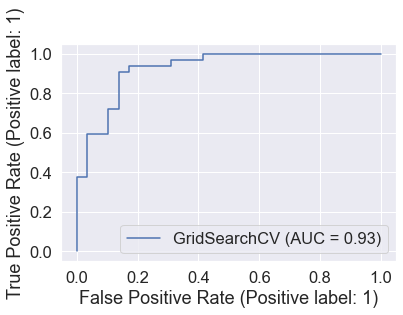

In [111]:
# Let's plot an ROC curve (Always evaluate your ML models on the test set)
plot_roc_curve(gs_log_reg, X_test, y_test)

In [112]:
# Let's plot the confusion matrix

confusion_matrix(y_test, y_preds) #(x-axis = y_preds (predicted labels), y-axis = y_test (actual_labels))

array([[25,  4],
       [ 3, 29]], dtype=int64)

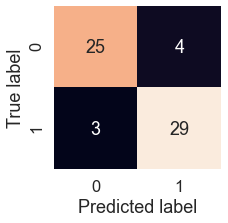

In [115]:
# This doesn't look good..let's visualize better..

# First set the size for sns
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    This plots a good looking confusion matrix using seaborn's heatmap  
    
    """
    fig, ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_matrix(y_test, y_preds)

### Now we've got the ROC curve, AUC metric and confusion matrix. Let's get the classification report and cross validated precision, f1-score and recall.

In [116]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculating evaluation metrics using cross-validation

In [121]:
# Now we're going to calculate F1-score, Precision and Recall by cross validation on our model using the cross_val_score() method.  

In [122]:
# Checking best params of our model
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [126]:
# Let's recreate our classifier
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

#### Calculating each metric using cross-validation

In [131]:
# Accuracy

cv_acc = cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [138]:
# Precision

cv_pre = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")

cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [139]:
# F1-score 

cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [140]:
# Recall

cv_rec = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")

cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

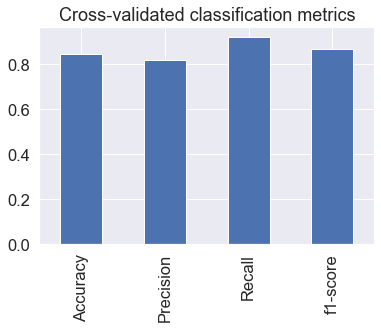

In [152]:
# Let's visualize these metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pre,
                          "Recall": cv_rec,
                          "f1-score": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

#### Feature Importance

Let's find out which features contribute most to the outcome of the model and how did they contributed..

Finding Feature importance is different for each model. (Suggestion : google for "Finding feature importance of MODEL_NAME")

#### Let's find Feature importance for our LogisticRegression Model.

In [174]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [175]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train);

In [176]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [178]:
# Match Columns to coeffs of Features

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

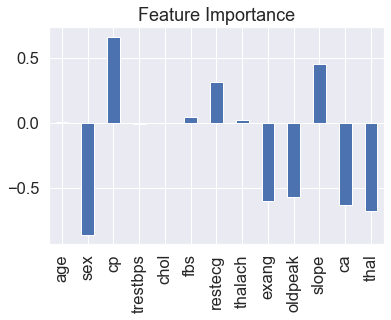

In [182]:
# Let's visualize better

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [183]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [187]:
# Slope (the slope of the peak exercise ST segment)

In [194]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


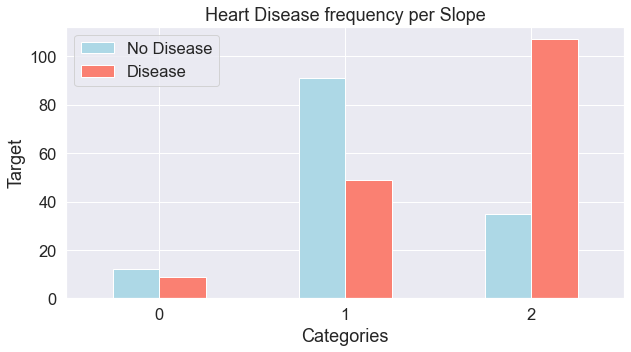

In [201]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize = (10,5), color=["lightblue", "salmon"])

plt.title("Heart Disease frequency per Slope")
plt.xlabel("Categories")
plt.ylabel("Target")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Experimentation is a never ending process. But still, we've found a Model that performs well on our data...

## So, based on the data given to us, we've found that the LogisticRegression model best fits our purpose of predicting whether someone has a heart disease or not depending upon the given characteristics of a patient. 